# Polynomial Regression (Salary Prediction)

KETERANGAN KOLOM:
1. Level = Tingkatan Pekerjaan \ Jabatan
2. Salary = Gaji (Target)

## A. Data Preparation

### A.1 Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [ ]:
try:
    df = pd.read_csv("dataset_level_salary.csv")
    print("Berhasil Membaca Data")
except Exception as e:
    print(f"Gagal memuat data as {e}")

Berhasil Membaca Data


In [69]:
df.head(6)

,level,salary
0,1.000000,10049.342831
1,1.009009,9921.442181
2,1.018018,10077.719673
3,1.027027,10251.866746
4,1.036036,9899.500792
5,1.045045,9898.566651


### A.3 Cek Dimensi Data

In [70]:
df.shape

(1000, 2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   level   1000 non-null   float64
 1   salary  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


### A.4 Cek Nilai Duplikasi

In [91]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat

### A.5 Cek Nilai yang hilang

In [73]:
df.isna().sum()

level     0
salary    0
dtype: int64

tidak ada nilai yang hilang

## B. Exploratory Data Analysis

### B.1 Cek Outliers

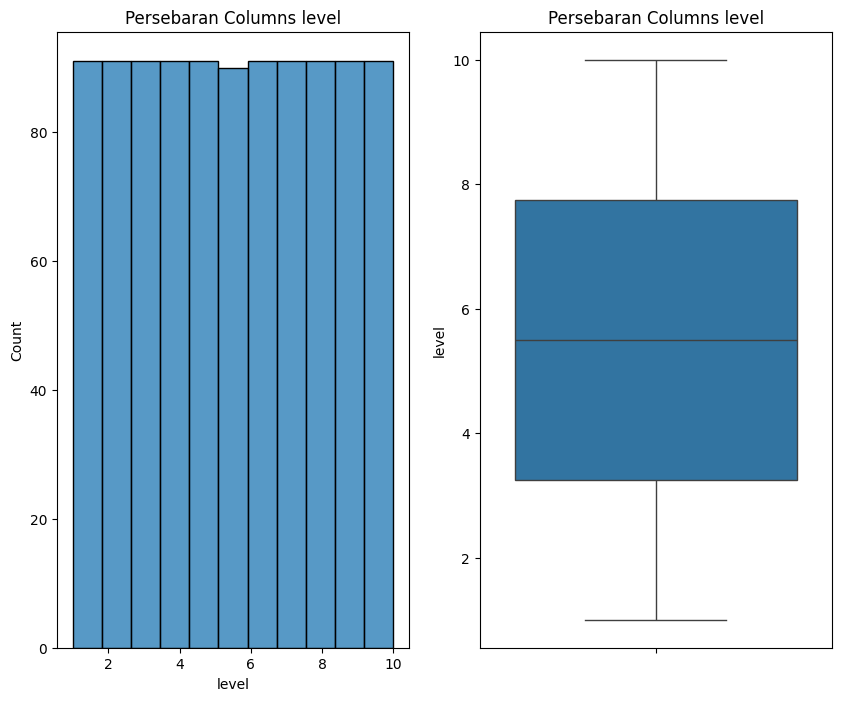

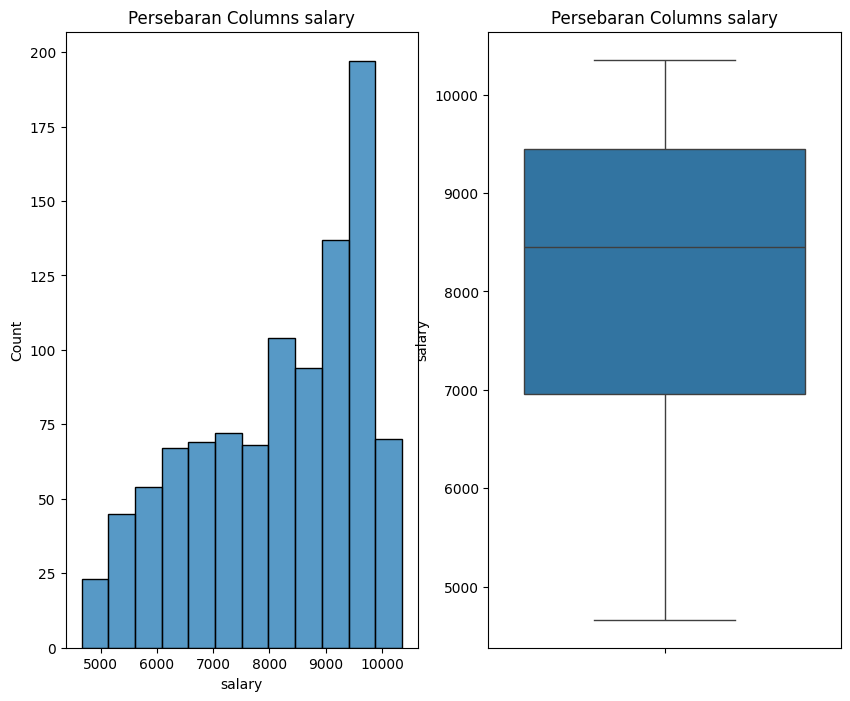

In [74]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

### B.2 Visualisasi Scatter 

In [75]:
df.columns

Index(['level', 'salary'], dtype='object')

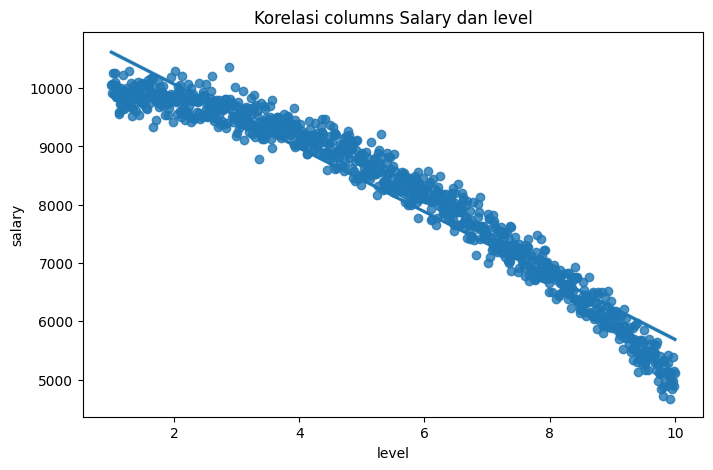

In [76]:
plt.figure(figsize=(8, 5))
sns.regplot(df, y='salary', x='level')
plt.title("Korelasi columns Salary dan level")
plt.show()

In [77]:
df.corr().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,level,salary
level,1.00,-0.97
salary,-0.97,1.00


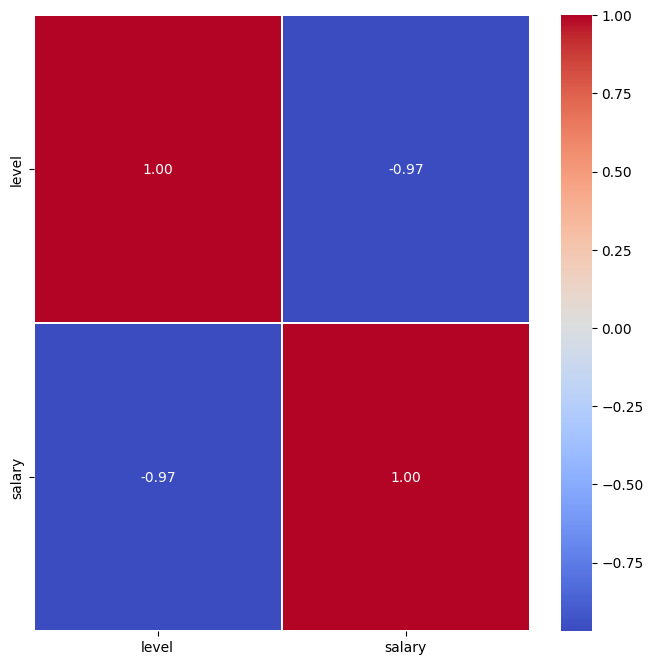

In [78]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), 
            annot=True,
            fmt='.2f',
            linewidths=1.1,
            cmap='coolwarm')
plt.show()

## C. Pemodelan Data

### Rumus Inti (The Golden Formula)

Ini adalah metode **Normal Equation** untuk mencari garis regresi terbaik secara instan menggunakan Aljabar Linear (Matriks).

$$\theta = (X^T X)^{-1} X^T y$$

**Keterangan Simbol:**
* $\theta$ (**Theta**): Hasil akhir yang kita cari (Weights). Berisi koefisien (Slope/$m$) dan bias (Intercept/$c$).
* $X$ (**Features**): Data fitur/input. **Wajib** ditambah kolom angka `1` di depannya (sebagai bias).
* $y$ (**Target**): Data target (output/jawaban).
* $^T$ (**Transpose**): Operasi memutar matriks (baris menjadi kolom).
* $^{-1}$ (**Inverse**): Kebalikan matriks (analoginya seperti pembagian dalam angka biasa).

---
**Implementasi dalam Numpy:**
```python
# Asumsi X_matrix sudah memiliki kolom bias (angka 1)
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_data

### C.1 Persiapan Data Untuk Matriks


In [79]:
df.columns

Index(['level', 'salary'], dtype='object')

In [80]:
X_data = df[['level']].values
X_kuadrat = X_data**2
y_data = df[['salary']].values

### C.2 Modifikasi Matriks (Tambah Bias)

In [81]:
# Kita perlu menambahkan angka '1' di depan setiap data X
# Agar rumus matriks bisa menghitung Intercept (Titik potong sumbu Y)
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_kuadrat, X_data), axis=1)

### C.3 Train Test Split (Membagi Data Latihan & Tes)

In [82]:
# 1. Acak urutan data (Shuffling)
np.random.seed(42) # Biar hasilnya acak konsisten
indices = np.random.permutation(len(X_matrix))

# 2. Tentukan ukuran data test, disini kami ambil 20%
test_size = int(len(X_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indices[:test_size] #untuk tes 20%
train_idx = indices[test_size:] #untuk train sisanya yaitu 80%

# 4. Buat Variabel Train & Test
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### C.4 Rumus Matriks Theta (The Normal Equation)

In [83]:
# 1. Hitung Theta dengan data train
# Kita cari rumus garis cuma pakai data latihan
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# 2. Hitung prediksi
# Kita tes modelnya suruh ngerjain soal
y_pred_test = X_test @ theta

### C.5 Ambil Hasil Modelling

In [84]:
intercept = theta[0][0]      # Intercept
koef_kuadrat = theta[1][0]   # Koefisien X^2 (Kelengkungan)
koef_linear = theta[2][0]    # Koefisien X (Kemiringan Garis)

print("--- HASIL MODELING (POLYNOMIAL) ---")
print(f"Intercept (Dasar): {intercept:.2f}")
print(f"Koefisien Level^2: {koef_kuadrat:.2f}")
print(f"Koefisien Level  : {koef_linear:.2f}")

print("\nRumus Lengkap:")
print(f"Gaji = {intercept:.2f} + ({koef_kuadrat:.2f} * Level^2) + ({koef_linear:.2f} * Level)")

--- HASIL MODELING (POLYNOMIAL) ---
Intercept (Dasar): 10006.04
Koefisien Level^2: -49.28
Koefisien Level  : -5.02

Rumus Lengkap:
Gaji = 10006.04 + (-49.28 * Level^2) + (-5.02 * Level)


### C.6 Visualisasi Hasil Regresi

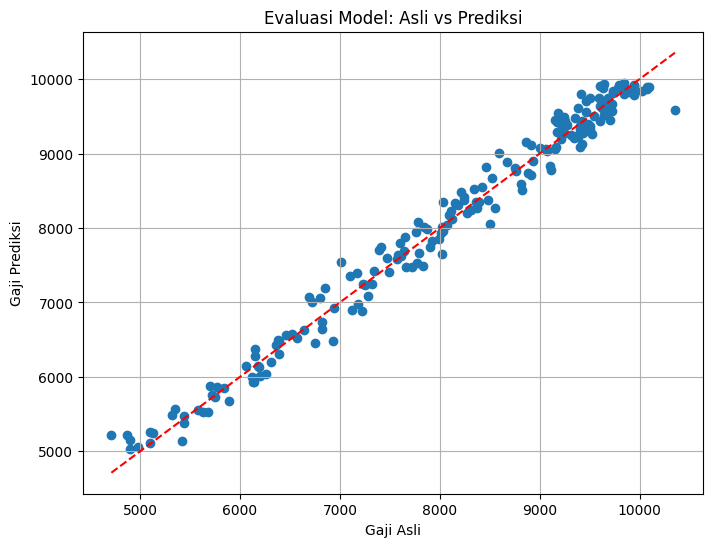

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Gaji Asli')
plt.ylabel('Gaji Prediksi')
plt.title('Evaluasi Model: Asli vs Prediksi')
plt.grid(True)
plt.show()

## D. Evaluasi Model

### D.1 Hitung MSE (Mean Squared Error)
Rata-rata kesalahan kuadrat (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [86]:
error = y_test - y_pred_test
mse = np.mean(error ** 2)
mse

np.float64(38083.92127231692)

### D.2 Hitung MAE (Mean Absolute Error)
Rata-rata kesalahan mutlak (selisih riil dalam satuan asli).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [88]:
mae = np.mean(np.abs(error))
mae

np.float64(155.04806123309723)

### D.3 Hitung R-Squared (Akurasi)
Seberapa pintar model menjelaskan pola data (dalam persen).
- Nilai Bagus: Semakin mendekati 1 (100%) semakin bagus.

In [89]:
# Rumus: 1 - (Error Model Kita / Error Rata-rata Polos)
ss_residual = np.sum(error ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - (ss_residual / ss_total)
r2_score

np.float64(0.9964649735992668)

### D.4 Perbandingan Latihan dengan Ujian (Mencegah Overfitting)

In [90]:
#Hitung Akurasi Latihan (Train Set)
y_pred_train = X_train @ theta

error_train = y_train - y_pred_train
ss_res_train = np.sum(error_train ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)

#Hitung Akurasi Ujian (Test Set)
error_test = y_test - y_pred_test
ss_res_test = np.sum(error_test ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

#Perbandingan
print(f"R2 Score Training : {r2_train:.5f}")
print(f"R2 Score Testing  : {r2_test:.5f}")
print(f"Selisih (Gap)     : {abs(r2_train - r2_test):.5f}")

#Analisa=
if abs(r2_train - r2_test) > 0.10: # Kalau bedanya lebih dari 10%
    print("\nOverfitting")
else:
    print("\nGood Fit")

R2 Score Training : 0.98214
R2 Score Testing  : 0.98261
Selisih (Gap)     : 0.00047

Good Fit
